In [1]:
# import packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

In [2]:
train = pd.read_excel('/content/lendingclub_traindata.xlsx')
validation = pd.read_excel('/content/lendingclub_valdata.xlsx')
test = pd.read_excel('/content/lendingclub_testdata.xlsx')
# 1 = good, 0 = default

#give column names
cols = ['home_ownership', 'income', 'dti', 'fico', 'loan_status']

train.columns = validation.columns=test.columns = cols

print(train.head())
print("--------------------------------")
print (validation.head())
print("--------------------------------")
print(test.head())


   home_ownership    income    dti  fico  loan_status
0               1   44304.0  18.47   690            0
1               0   50000.0  29.62   735            1
2               0   64400.0  16.68   675            1
3               0   38500.0  33.73   660            0
4               1  118000.0  26.66   665            1
--------------------------------
   home_ownership    income    dti  fico  loan_status
0               0   25000.0  27.60   660            0
1               0   50000.0  21.51   715            1
2               1  100000.0   8.14   770            1
3               0   75000.0   1.76   685            0
4               1   78000.0  16.11   680            1
--------------------------------
   home_ownership    income    dti  fico  loan_status
0               1   52400.0  24.64   665            1
1               1  150000.0  17.04   785            1
2               1  100000.0  20.92   710            1
3               0   97000.0  13.11   705            1
4               

The data has already been split into training set, validation set, and test set. There are 7000 instances of the training set, 3000 instances of the validation set and 2290 instances of the test set. The four features have been labeled as: home ownership, income, dti and fico.

In [3]:
# remove target column to create feature only dataset
X_train = train.drop('loan_status', 1) 
# The 1 argument passed to the drop method indicates that we want to drop a column 
#(as opposed to a row, which would be indicated by passing 0).
X_val = validation.drop('loan_status', 1)
X_test = test.drop('loan_status', 1)

print(X_test.head())


   home_ownership    income    dti  fico
0               1   52400.0  24.64   665
1               1  150000.0  17.04   785
2               1  100000.0  20.92   710
3               0   97000.0  13.11   705
4               1  100000.0  24.08   685


In [4]:
# Scale data using the mean and standard deviation of the training set. 
# This is not necessary for the simple logistic regression we will do here 
# but should be done if L1 or L2 regrularization is carried out
X_train= (X_train - X_train.mean())/X_train.std()
X_val= (X_val-X_val.mean())/X_val.std()
X_test=(X_test-X_test.mean())/X_test.std()

# store target column as y-variables 
y_train = train['loan_status']
y_val = validation['loan_status']
y_test = test['loan_status']

#print first five instances for each data set

print(X_train.head())
print("--------------------------------")
print(X_val.head())
print("--------------------------------")
print(X_test.head())

print(X_train.shape, y_train.shape, X_val.shape,y_val.shape, X_test.shape, y_test.shape)
X_train.columns

   home_ownership    income       dti      fico
0        0.809651 -0.556232  0.053102 -0.163701
1       -1.234923 -0.451393  1.307386  1.262539
2       -1.234923 -0.186349 -0.148259 -0.639114
3       -1.234923 -0.663060  1.769728 -1.114527
4        0.809651  0.800204  0.974410 -0.956056
--------------------------------
   home_ownership    income       dti      fico
0       -1.263673 -1.038003  1.168903 -1.154998
1       -1.263673 -0.519708  0.436285  0.620680
2        0.791080  0.516883 -1.172105  2.396358
3       -1.263673 -0.001412 -1.939610 -0.347871
4        0.791080  0.060783 -0.213326 -0.509297
--------------------------------
   home_ownership    income       dti      fico
0        0.829753 -0.433367  0.838798 -0.978248
1        0.829753  1.257596 -0.078113  2.791260
2        0.829753  0.391324  0.389994  0.435318
3       -1.204652  0.339347 -0.552252  0.278255
4        0.829753  0.391324  0.771236 -0.349996
(7000, 4) (7000,) (3000, 4) (3000,) (2290, 4) (2290,)


Index(['home_ownership', 'income', 'dti', 'fico'], dtype='object')

In [5]:
freq = y_train.value_counts()           # value_counts() counts frequency of different classes in training swet
freq/sum(freq)*100                      # get percentage of above

1    79.171429
0    20.828571
Name: loan_status, dtype: float64

In [6]:
#Create a logistic regression model with the following settings:

lgstc_reg = LogisticRegression(penalty="none",solver="newton-cg")  

## penalty="none": This parameter sets the type of regularization penalty used in the logistic regression model. 
# Here, "none" indicates that no penalty will be applied, which means that the model will use standard logistic regression 
# without any regularization (L1 (Lasso) & L2 (Ridge)).

### solver="newton-cg": This parameter sets the optimization algorithm used to fit the logistic regression model. 
# Here, "newton-cg" indicates that the model will use the Newton-Conjugate-Gradient optimization algorithm, 
# which is a method for finding the maximum of the log-likelihood function in logistic regression.

# Fit logististic regression to training set

lgstc_reg.fit(X_train,y_train)

print(lgstc_reg.intercept_ ,lgstc_reg.coef_)


[1.4162429] [[ 0.14531037  0.03366005 -0.32404502  0.36315462]]


When used on scaled data the model has a bias of 1.416 and coefficients of 0.145, 0.034, -0.324 and 0.363. We now test the model on the validation set.

In [11]:
# y_train_pred, y_val_pred, and y_test_pred are the predicted probabilities for the training set
# validation set and test set using the fitted logistic regression model

y_train_pred=lgstc_reg.predict_proba(X_train)
y_val_pred=lgstc_reg.predict_proba(X_val)
y_test_pred=lgstc_reg.predict_proba(X_test)

print(y_train)
y_train_pred

0       0
1       1
2       1
3       0
4       1
       ..
6995    1
6996    1
6997    1
6998    0
6999    1
Name: loan_status, Length: 7000, dtype: int64


array([[0.19177543, 0.80822457],
       [0.22158616, 0.77841384],
       [0.25990378, 0.74009622],
       ...,
       [0.15340485, 0.84659515],
       [0.31304433, 0.68695567],
       [0.19166666, 0.80833334]])

In [12]:
# Calculate maximum likelihood for training set, validation set, and test set

mle_vector_train = np.log(np.where(y_train == 1, y_train_pred[:,1], y_train_pred[:,0]))
###** y_train: This is a 1D array containing the true binary labels for the training set, 
# where 1 indicates a positive class (e.g., "default") and 0 indicates a negative class (e.g., "no default").

#** y_train_pred: This is a 2D array containing the predicted probabilities for the training set, 
# output by the logistic regression model. The first column represents the predicted probability for the negative class, 
# and the second column represents the predicted probability for the positive class.

#**np.where(y_train == 1, y_train_pred[:,1], y_train_pred[:,0]): This is a NumPy array that applies a condition 
#to y_train and selects the corresponding value from y_train_pred for each instance in the training set. 
#Specifically, it selects the second column (y_train_pred[:,1]) for instances where y_train is 1 
# (i.e., the positive class), and it selects the first column (y_train_pred[:,0]) for instances where y_train is 0
# (i.e., the negative class). This creates a 1D array of predicted probabilities for the positive class only.

## np.log(): This is a NumPy function that takes the natural logarithm of each element in the input array.

## mle_vector_train: This is a 1D array containing the MLE of the model parameters for the logistic regression model,
# using the training set data. 
mle_vector_val = np.log(np.where(y_val == 1, y_val_pred[:,1], y_val_pred[:,0]))
mle_vector_test = np.log(np.where(y_test == 1,y_test_pred[:,1],y_test_pred[:,0]))

# Calculate cost functions from maximum likelihoods

cost_function_training=np.negative(np.sum(mle_vector_train)/len(y_train))
cost_function_val =np.negative(np.sum(mle_vector_val)/len(y_val))
cost_function_test = np.negative(np.sum(mle_vector_test)/len(y_test))

print('cost function training set =', cost_function_training)
print('cost function validation set =', cost_function_val)
print('cost function test set =', cost_function_test)

cost function training set = 0.49111143543170926
cost function validation set = 0.4859139738776364
cost function test set = 0.4842799376359875


<br> 
An analyst must decide on a criterion for predicting whether loan will be good or default. This involves specifying a threshold By default this threshold is set to 0.5, i.e., loans are separated into good and bad categories according to whether the probability of no default is greater or less than 0.5. However this does not work well for an imbalanced data set such as this. It would predict that all loans are good! We will look at the results for few other thresholds. 



In [13]:
## This code is performing a binary classification analysis using logistic regression and calculating several 
# performance metrics for different probability thresholds. Here is a line-by-line explanation:

# A list of three probability thresholds is defined.
THRESHOLD = [.75, .80, .85]
# Create dataframe to store resultd: A pandas DataFrame is created to store the results of the analysis. 
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results

# The values of THRESHOLD are assigned to the "THRESHOLD" column of the results DataFrame.
results['THRESHOLD'] = THRESHOLD                                                                         
             
j = 0  # A counter variable is set to zero.                                                                                                    

# Iterate over the 3 thresholds

for i in THRESHOLD: #  A loop is initiated that will iterate over the three probability thresholds.                                                                                    
    
    
    #lgstc_reg.fit(X_train, y_train)                                                                    
    
    
    # If prob for test set > threshold predict 1
    preds = np.where(lgstc_reg.predict_proba(X_test)[:,1] > i, 1, 0)                                      
    
    
    # create confusion matrix using confusion_matrix from sklearn
    # A confusion matrix is calculated using confusion_matrix from scikit-learn. 
    # The "y_test" labels and the "preds" predictions are used as inputs.
    # The labels for the positive and negative class are specified using the labels parameter.
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / len(y_test))*100                
    
    print('Confusion matrix for threshold =',i) # The current threshold i is printed to the console.
    print(cm) # The confusion matrix cm is printed to the console.
    print(' ') # An empty line is printed to the console.      
    
    TP = cm[0][0] # The number of true positives is extracted from the confusion matrix cm                                                                                  
    FN = cm[0][1] # The number of false negatives is extracted from the confusion matrix cm                                                                                       
    FP = cm[1][0] # The number of false positives is extracted from the confusion matrix cm.                                                                                       
    TN = cm[1][1] # The number of true negatives is extracted from the confusion matrix cm.                                                                                        
        
    results.iloc[j,1] = accuracy_score(y_test, preds)  # The accuracy score of the predictions is calculated using accuracy_score from scikit-learn and stored in the "accuracy" column of the results DataFrame at the current index j.
    results.iloc[j,2] = recall_score(y_test, preds) # The recall score (i.e., true positive rate) of the predictions is calculated using recall_score from scikit-learn and stored in the "true pos rate" column of the results DataFrame at the current index j.
    results.iloc[j,3] = TN/(FP+TN)                                                                        
    results.iloc[j,4] = FP/(FP+TN)                                                                        
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)
   
   
    j += 1

print('ALL METRICS')
print( results.T)

    
    
   

Confusion matrix for threshold = 0.75
[[59.6069869  19.56331878]
 [11.48471616  9.34497817]]
 
Confusion matrix for threshold = 0.8
[[42.18340611 36.98689956]
 [ 6.20087336 14.62882096]]
 
Confusion matrix for threshold = 0.85
[[22.05240175 57.11790393]
 [ 2.88209607 17.94759825]]
 
ALL METRICS
                       0         1         2
THRESHOLD           0.75       0.8      0.85
accuracy         0.68952  0.568122       0.4
true pos rate   0.752896  0.532819  0.278544
true neg rate   0.448637  0.702306  0.861635
false pos rate  0.551363  0.297694  0.138365
precision       0.838452  0.871841  0.884413
f-score         0.793374  0.661417  0.423658


<br>
This table shows that there is a trade off betwee the true positive rate and the false positive rate.  
We can improve the percentage of good loans we identify only by increasing the percentage of bad that are misclassified.
The receiver operating curve (ROC) captures this trade off by considering different thresholds.

AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.6577628841779786


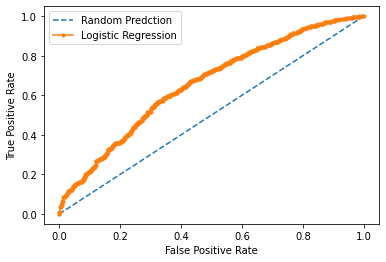

In [ ]:
# Calculate the receiver operating curve and the AUC measure

lr_prob=lgstc_reg.predict_proba(X_test)
lr_prob=lr_prob[:, 1] # This code extracts the predicted probabilities of the 
# positive class from the lr_prob variable. The predicted probabilities are stored 
# in the same lr_prob variable.
ns_prob=[0 for _ in range(len(y_test))]
# This code creates a list of 0s with the same length as the test set (y_test). 
# This list represents the predicted probabilities of the positive class for a 
# random prediction model.
ns_auc=roc_auc_score(y_test, ns_prob)
# This code calculates the Area Under the ROC Curve (AUC) for the random 
# prediction model, using the true labels (y_test) and the predicted probabilities (ns_prob). 
# The AUC score is stored in the ns_auc variable.
lr_auc=roc_auc_score(y_test,lr_prob)
# This code calculates the AUC for the logistic regression model, using the 
# true labels (y_test) and the predicted probabilities (lr_prob). 
# The AUC score is stored in the lr_auc variable.
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =", lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
# This code calculates the False Positive Rate (FPR) and True Positive Rate (TPR)
# for the random prediction model, using the true labels (y_test) and the predicted probabilities (ns_prob). 
# The FPR, TPR, and thresholds are stored in the ns_fpr, ns_tpr, and _ variables, respectively.
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_prob)
# This code calculates the FPR and TPR for the logistic regression model, using 
# the true labels (y_test) and the predicted probabilities (lr_prob). 
# The FPR, TPR, and thresholds are stored in the lr_fpr, lr_tpr, and _ variables, respectively.
# The roc_curve() function returns three arrays:
# The first array (lr_fpr) represents the false positive rate at each threshold.
# The second array (lr_tpr) represents the true positive rate at each threshold.
# The third array represents the thresholds.
# Since we only need the first two arrays in this code line, we use the underscore (_) 
# as a placeholder for the third array that we don't need. This is a common convention 
# in Python to indicate that a particular variable is not needed.
plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()